In [15]:
import os
import tables as tb
import numpy  as np
from matplotlib import pyplot as plt

from invisible_cities.cities.penthesilea     import Penthesilea
from invisible_cities.core.system_of_units_c import units
from invisible_cities.core.configure         import configure
from invisible_cities.reco.dst_functions     import load_dst
from invisible_cities.io                     import pmap_io  as pio
from invisible_cities.io                     import dst_io   as dio

In [16]:
run = 4446
ic_data = os.path.join(os.environ['IC_DATA'])
#pmap_path = '/Users/alej/Desktop/irene/full_chain/Kr_4446_full_chain.h5'                                 # data

#pmap_path = ic_data + 'Montecarlo/Kr/dst_NEXT_v0_08_09_Kr_ACTIVE_0_0_7bar_pmaps_10000.root.h5'           # old MC
pmap_path = '/Users/alej/Desktop/irene/full_chain/Kr_4446_full_chain.h5'                                 # data
#pmap_path =  ic_data + 'Montecarlo/Kr/new_mc/dst_NEXT_v1_00_05_Kr_ACTIVE_0_0_7bar_pmaps_1000.root.h5.h5'  # new MC
conf_path = '/Users/alej/Desktop/Valencia/nextic/IC-1/invisible_cities/config/penthesilea.conf'

In [17]:
# initialize dorothea
PATH_IN  = os.path.join(pmap_path)
PATH_OUT = os.path.join('/Users/alej/Desktop/penthesilea/garbage.h5')
conf     = configure(('dummy ' + conf_path).split()).as_dict
conf.update(dict(run_number = run,
                 files_in   = PATH_IN,
                 file_out   = PATH_OUT,
                 rebin      = 10,
                 nmax       = 100000))
penthesilea = Penthesilea(**conf)
#penthesilea.run()

In [18]:
dst = dio.load_dst(PATH_OUT, 'RECO', 'Events')
#dst

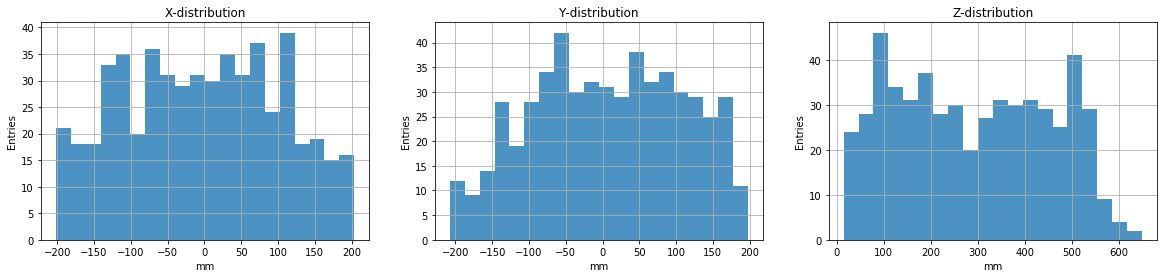

In [19]:
plt.figure(figsize=(20,4))
subplot=131
for feature, coord in zip([dst.X, dst.Y, dst.Z], ['X', 'Y', 'Z']):
    plt.subplot(subplot)
    plt.hist(feature, bins=20, alpha=.8)
    plt.title(coord + '-distribution')
    plt.xlabel('mm')
    plt.ylabel('Entries')
    plt.grid(True)
    subplot+=1
plt.show()

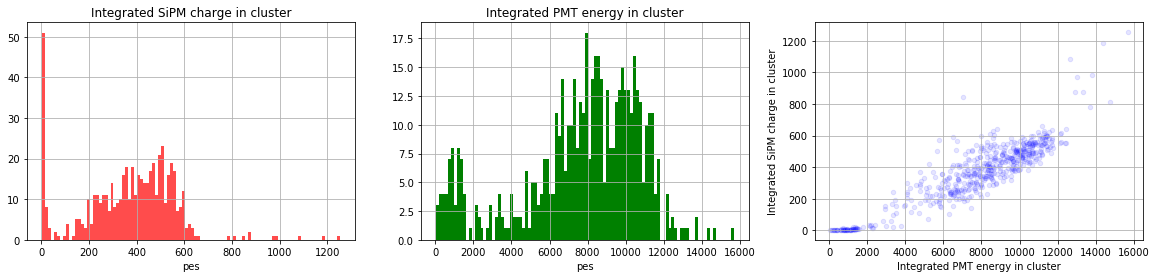

In [20]:
plt.figure(figsize=(20, 4))
plt.subplot(131); plt.hist(dst.Q, bins=100, color='r', alpha=.7)
plt.title('Integrated SiPM charge in cluster')
plt.xlabel('pes')
plt.grid(True)
plt.subplot(132); plt.hist(dst.E, bins=100, color='g')
plt.title('Integrated PMT energy in cluster')
plt.xlabel('pes')
plt.grid(True)
plt.subplot(133); plt.scatter(dst.E, dst.Q, s=20, c='b', alpha=.1)
plt.xlabel('Integrated PMT energy in cluster')
plt.ylabel('Integrated SiPM charge in cluster')
plt.grid(True)
plt.show()

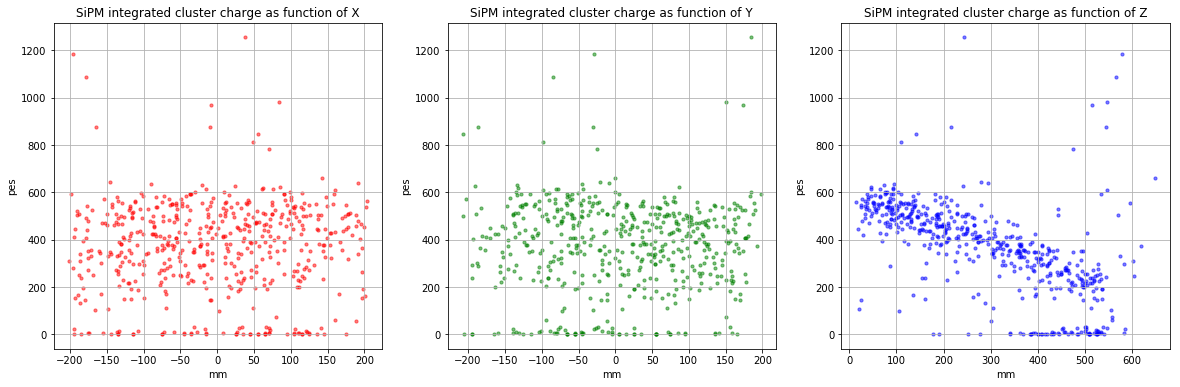

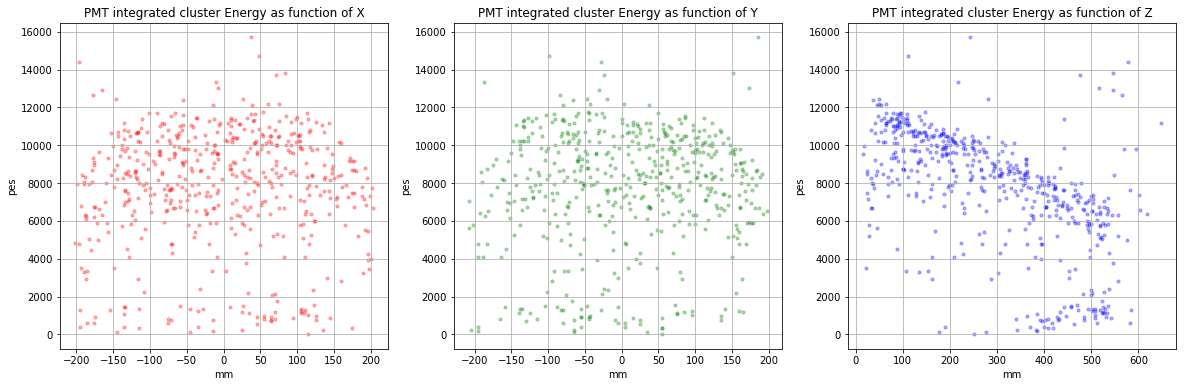

In [21]:
plt.figure(figsize=(20,6))
subplot=131
C = ['r', 'g', 'b']
for feature, lab, c  in zip([dst.X, dst.Y, dst.Z], ['X', 'Y', 'Z'], C):
    plt.subplot(subplot)
    plt.scatter(feature, dst.Q, s=10, c=c, alpha=.5)
    plt.title('SiPM integrated cluster charge as function of ' + lab)
    plt.xlabel('mm')
    plt.ylabel('pes')
    subplot+=1
    plt.grid(True)
plt.show()
plt.figure(figsize=(20,6))
subplot=131
for feature, lab, c  in zip([dst.X, dst.Y, dst.Z], ['X', 'Y', 'Z'], C):
    plt.subplot(subplot)
    plt.scatter(feature, dst.E, s=10, c=c, alpha=.3)
    plt.title('PMT integrated cluster Energy as function of ' + lab)
    plt.xlabel('mm')
    plt.ylabel('pes')
    subplot+=1
    plt.grid(True)
plt.show()

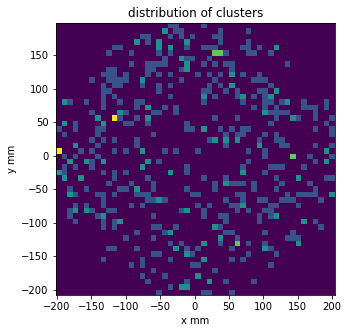

In [22]:
plt.figure(figsize=(5,5))
plt.hist2d(dst.X, dst.Y, bins=(50, 50))
plt.xlabel('x mm') 
plt.ylabel('y mm')
plt.title('distribution of clusters')
plt.show()

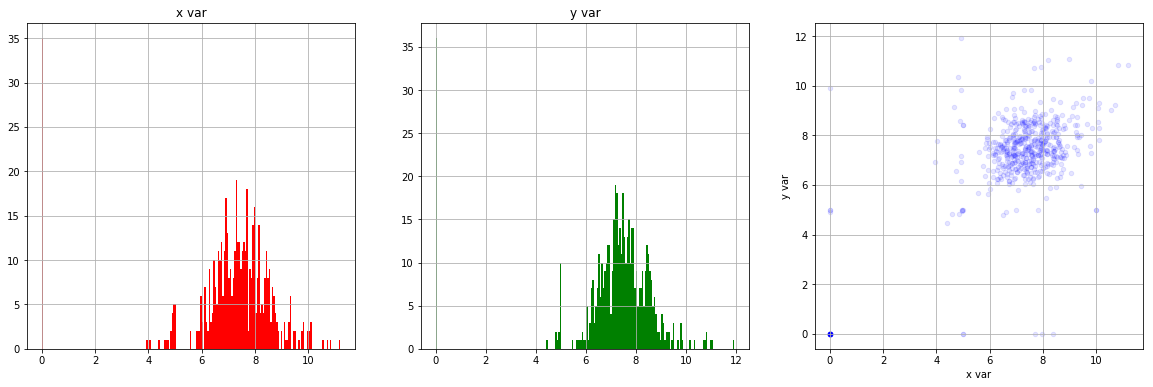

In [23]:
plt.figure(figsize=(20,6))
from matplotlib.colors import LogNorm
subplot=131
labels = ['x var', 'y var']
C = ['red', 'green']
for feature, lab , c in zip([dst.Xrms, dst.Yrms], labels, C):
    plt.subplot(subplot)
    plt.hist(feature, bins=200, color=c)
    plt.title(lab)
    plt.grid(True)
    subplot+=1
plt.subplot(subplot)
plt.scatter(dst.Xrms, dst.Yrms, s=20, alpha=.1, c='b')
#plt.hist2d(dst.Xrms, dst.Yrms, bins=(30,30), norm=LogNorm())
#plt.colorbar()
plt.xlabel(labels[0])
plt.ylabel(labels[1])
plt.grid(True)
plt.show()

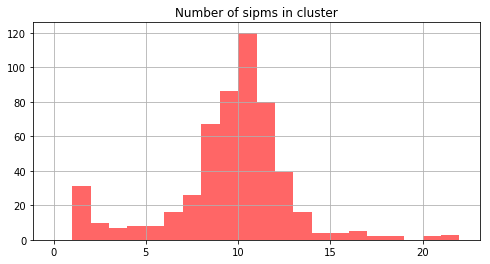

In [24]:
plt.figure(figsize=(8,4))
plt.hist(dst.nsipm, bins=range(0, dst.nsipm.max() + 1), color='red', alpha=.6)
plt.grid(True)
plt.title('Number of sipms in cluster')
plt.show()